# Lab 2:Handling Missing Value 

###  Data Import

In [68]:
import pandas as pd
import numpy as np

In [69]:
data=pd.read_csv("C:/Users/codex/Desktop/FTI/Datasets/property.csv")

### Know Your Data - Data Description

In [70]:
data.shape

(9, 7)

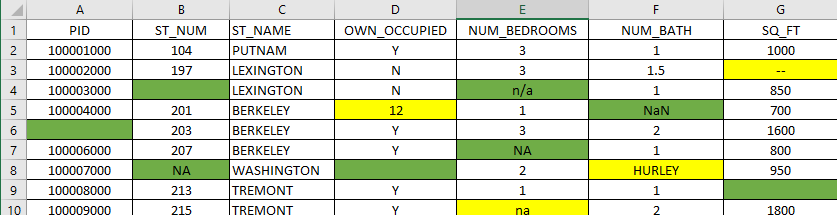

In [71]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


Data Description 
        1. PID: Property ID
        2. ST_NUM : Street Number
        3. ST_NAME: Street Name 
        4. OWN_OCCUPIED : VACANT or OCCUPIED
        5. NUM_BEDROOMS: Number of Bed Rooms
        6. NUM_BATH: Number of Bathrooms 
        7 SQ_FT : Area in Feet


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
PID             8 non-null float64
ST_NUM          7 non-null float64
ST_NAME         9 non-null object
OWN_OCCUPIED    8 non-null object
NUM_BEDROOMS    7 non-null object
NUM_BATH        8 non-null object
SQ_FT           8 non-null object
dtypes: float64(2), object(5)
memory usage: 584.0+ bytes


### Checking NULL Values 

In [73]:
 data.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

data.isnull.sum() returns the total number of missing values in all columns
Values Recognized as  Missing Values by Pandas as NaN
1. NA
2. NaN
3. n/a
4. Blank 


### Check Individual Columns for Null Values 
There may be some missing values which are not identified by Pandas as Missing Values (NaN)

In [114]:
print (data['SQ_FT'].isnull())

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7     True
8    False
Name: SQ_FT, dtype: bool


In [75]:
print (data['ST_NUM'].isnull())

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool


In [76]:
print (data['NUM_BATH'].isnull())

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8    False
Name: NUM_BATH, dtype: bool


In [77]:
print (data['NUM_BEDROOMS'])

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7      1
8     na
Name: NUM_BEDROOMS, dtype: object


In [78]:
print (data['NUM_BEDROOMS'].isnull())

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool


### Identify other values in data which can be considered as Missing Values

In [79]:
missing=["na","--"]

In [80]:
data=pd.read_csv("C:/Users/codex/Desktop/FTI/Datasets/property.csv", na_values=missing)

In [81]:
data.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           2
dtype: int64

In [82]:
print (data['NUM_BEDROOMS'].isnull())

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8     True
Name: NUM_BEDROOMS, dtype: bool


In [83]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


### Invalid data is also treated as MIssing Values , so replace Invalid Data with NaN

In [ ]:
Replace all the invalid entries ( Numbers here (12) ) with NaN

In [84]:
cnt=0
for row in data['OWN_OCCUPIED']:
    try:
        int(row)
        data.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [86]:
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [93]:

print (data.isnull().sum())


PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           2
dtype: int64


### Sometimes you may need to replace individual values : 
Use loops to replace all such invlaid values 

In [95]:
data.loc[4,'PID'] = 100005000

In [96]:
print (data.isnull().sum())

PID             0
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           2
dtype: int64


### Impute Missing Values Using Mean / Median / Mode

In [98]:
median = data['NUM_BEDROOMS'].median()
data['NUM_BEDROOMS'].fillna(median, inplace=True)

In [99]:
print (data.isnull().sum())

PID             0
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    0
NUM_BATH        1
SQ_FT           2
dtype: int64


In [100]:
mode = data['NUM_BATH'].mode()
data['NUM_BATH'].fillna(mode, inplace=True)

In [101]:
print(data.isnull().sum())

PID             0
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    0
NUM_BATH        1
SQ_FT           2
dtype: int64


### Sometimes you may need to delete all rows with missing values 

In [110]:
data2=data.dropna()

In [111]:
data2

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.5,1,800.0
8,100009000.0,215.0,TREMONT,Y,2.5,2,1800.0


### HOME WORK : HANDLE ALL THE MISSING VALUES IN THE GIVEN DATASET 

### Missing Values PART-2

In [130]:
df=import_data(DATA_PATH + "diabetes.csv")

In [131]:
df.shape

(768, 9)

In [132]:
df.head()

,times_preg,gluco_concent,Diastolic BP,Triceps_Thickness,Hour_insulin,BMI,D_pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [133]:
df.columns

Index(['times_preg', 'gluco_concent', 'Diastolic BP', 'Triceps_Thickness',
       'Hour_insulin', 'BMI', 'D_pedigree', 'Age ', 'Class'],
      dtype='object')

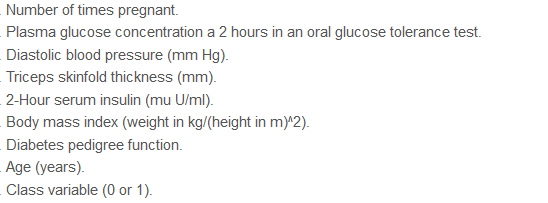

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
times_preg           768 non-null int64
gluco_concent        768 non-null int64
Diastolic BP         768 non-null int64
Triceps_Thickness    768 non-null int64
Hour_insulin         768 non-null int64
BMI                  768 non-null float64
D_pedigree           768 non-null float64
Age                  768 non-null int64
Class                768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [135]:
df.describe()

,times_preg,gluco_concent,Diastolic BP,Triceps_Thickness,Hour_insulin,BMI,D_pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are five columns where minimum value is zero , but domain knowledge say that it cannot be zero. These fileds are gluco_content , Diastolic BP, Triceps_Thickness and BMI

In [136]:
df.head(20)

,times_preg,gluco_concent,Diastolic BP,Triceps_Thickness,Hour_insulin,BMI,D_pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [137]:
print((df[['gluco_concent','Diastolic BP','Triceps_Thickness','Hour_insulin','BMI']] == 0).sum())

gluco_concent          5
Diastolic BP          35
Triceps_Thickness    227
Hour_insulin         374
BMI                   11
dtype: int64


Replacing 0 with Nan

In [138]:
df[['gluco_concent','Diastolic BP','Triceps_Thickness','Hour_insulin','BMI']]=
df[['gluco_concent','Diastolic BP','Triceps_Thickness','Hour_insulin','BMI']].replace(0,numpy.NaN)


In [139]:
df.isnull().sum()

times_preg             0
gluco_concent          5
Diastolic BP          35
Triceps_Thickness    227
Hour_insulin         374
BMI                   11
D_pedigree             0
Age                    0
Class                  0
dtype: int64

In [140]:
df.head(20)

,times_preg,gluco_concent,Diastolic BP,Triceps_Thickness,Hour_insulin,BMI,D_pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [141]:
df2=df.copy()

In [142]:
df.head()

,times_preg,gluco_concent,Diastolic BP,Triceps_Thickness,Hour_insulin,BMI,D_pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Values with a NaN value are ignored from operations like sum, count, etc

Strategy 01 : Remove Rows or Columns with Missing Data 

In [143]:
df.dropna(inplace=True)

In [145]:
df2.shape

(768, 9)

Strategy 02: Replace with Mean Value 

In [154]:
df2.fillna(df2.mean(), inplace=True)

In [153]:
df2.head(10)

,times_preg,gluco_concent,Diastolic BP,Triceps_Thickness,Hour_insulin,BMI,D_pedigree,Age,Class
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [155]:
df2.isnull().sum()

times_preg           0
gluco_concent        0
Diastolic BP         0
Triceps_Thickness    0
Hour_insulin         0
BMI                  0
D_pedigree           0
Age                  0
Class                0
dtype: int64